In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [7]:
warnings.filterwarnings("ignore")

In [8]:
import os

base_dir = os.getcwd()

df = pd.read_csv(f"{base_dir}/Arrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
df = pd.read_csv(f"{base_dir}/Arrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
!pip install pyclustertend

^C
ERROR: Operation cancelled by user
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [13]:
#from pyclustertend import hopkins
#from sklearn.preprocessing import scale
#hopkins(scale(df), df.shape[0])

In [14]:
from sklearn.cluster import KMeans

In [15]:
k_means = KMeans(n_clusters=2, random_state=42)

In [16]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

In [17]:
clusters = k_means.labels_

In [18]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

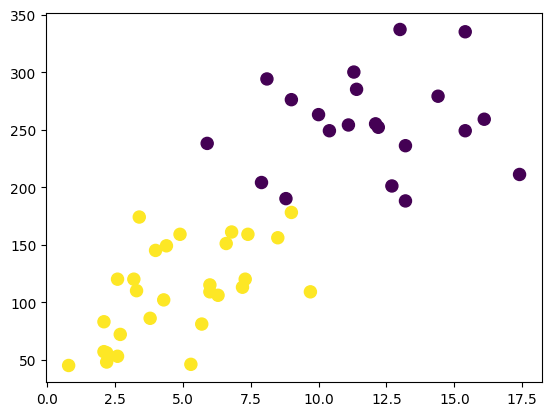

In [21]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=75, cmap='viridis')

In [20]:
centroids = k_means.cluster_centers_

In [22]:
centroids

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

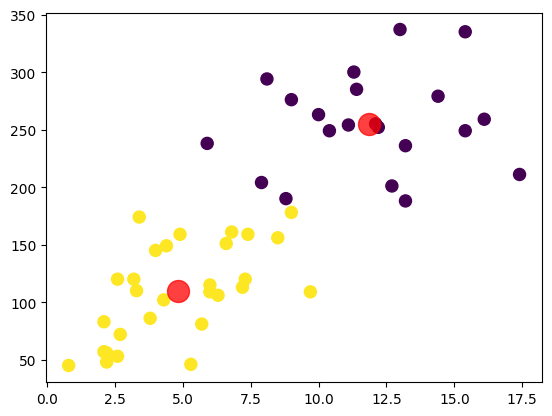

In [30]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=75, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=250, alpha=0.75)

In [31]:
rate = []

K = range(2, 10)

for i in K:
    k_means = KMeans(n_clusters=i)
    k_means.fit(df)
    rate.append(k_means.inertia_)

In [32]:
rate

[96399.02814449917,
 47964.26535714285,
 34728.62935714286,
 24417.023523809527,
 18768.000666666667,
 15463.473777777777,
 13285.616920634922,
 11125.03380952381]

Text(0.5, 1.0, 'Elbow')

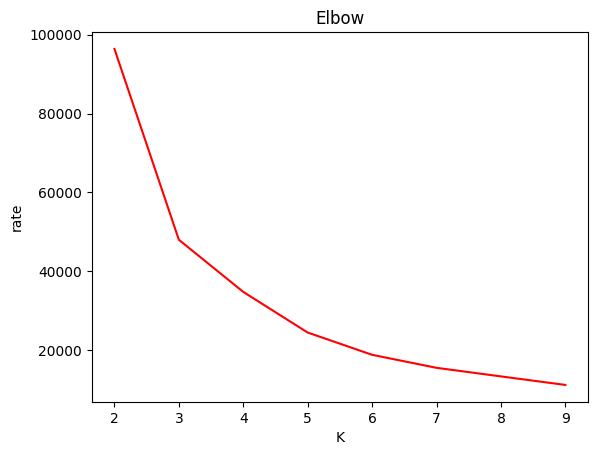

In [34]:
plt.plot(K, rate, "red")
plt.xlabel("K")
plt.ylabel("rate")
plt.title("Elbow")

In [4]:
!pip install yellowbrick

ERROR: Could not find a version that satisfies the requirement yellowbrick (from versions: none)
ERROR: No matching distribution found for yellowbrick
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [36]:
# k_means_yellow_brick = KMeans()
# graph = KElbowVisualizer(k_means_yellow_brick, k=(2,10))
# graph.fit(df)
# graph.proof

In [37]:
new_k_means = KMeans(n_clusters=4, random_state=42)

In [38]:
new_k_means.fit(df)

KMeans(n_clusters=4, random_state=42)

In [41]:
labels = new_k_means.labels_

In [42]:
labels

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0], dtype=int32)

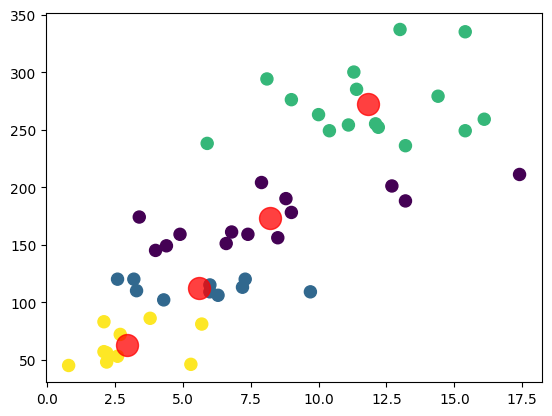

In [44]:
centroids = new_k_means.cluster_centers_
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, s=75, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=250, alpha=0.75)

In [45]:
df['cluster_id'] = labels

In [46]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [47]:
from sklearn.metrics import silhouette_score

In [49]:
print(f"Silhouettte score n=4 : {silhouette_score(df, labels)}")

# If the Silhouettte score is closer to 1 it is better for us and means the clusters are well seperated from each other

Silhouettte score n=4 : 0.5014799771920441


In [50]:
from sklearn.metrics.cluster import adjusted_rand_score

In [51]:
df.sample(n=15, random_state=42)

,Murder,Assault,UrbanPop,Rape,cluster_id
Indiana,7.2,113,65,21.0,1
South Carolina,14.4,279,48,22.5,2
New Mexico,11.4,285,70,32.1,2
Virginia,8.5,156,63,20.7,0
Louisiana,15.4,249,66,22.2,2
Wisconsin,2.6,53,66,10.8,3
Nebraska,4.3,102,62,16.5,1
Montana,6.0,109,53,16.4,1
North Carolina,13.0,337,45,16.1,2
Maryland,11.3,300,67,27.8,2


In [53]:
adjusted_rand_score(df["cluster_id"], labels)

1.0

In [54]:
## The closer ARI is to 1 the better the model is.